## Final Project Submission

Please fill out:
* Student name: Vivienne DiFrancesco
* Student pace: Full Time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


Introduction: 


In [2]:
import re
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import lxml

Box Office Mojo had great information for the gross profits of the movies and each page was neatly organized by year. The URL was also easy to break down for the different years which made it easy to write into a function. 

# Scraping: Exploring the HTML 

After creating my soup I tinkered around to find the right places where the data I wanted lived in the code. That's what is shown here in the next cell

## Scraping: Writing the Function

In [ ]:
# df = pd.DataFrame(scrape_movies('https://www.boxofficemojo.com/year/world/', range(2000,2021)))
# df.to_csv(r'C:\Users\drudi\DataScience\Module01\Final Project\Module-1-Final-Project\BoxOfficMojoScrapeFinal.csv')
# df

## Scraping: Got the Final File

In [3]:
df = pd.read_csv('BoxOfficeMojoScrapeFinal.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Year_Rank,Title,Worldwide_Gross,Domestic,Percent_Domestic,Foreign,Percent_Foreign,Year,Domestic Distributor,Domestic Opening,Budget,Earliest Release Date,MPAA,Running Time,Genres,\n IMDbPro\n
0,0,0,1,Bad Boys for Life,"$419,074,646","$204,417,855",48.8%,"$214,656,791",51.2%,2020,Sony Pictures Entertainment (SPE)See full comp...,"$62,504,105","$90,000,000","January 15, 2020\n (LATAM, APAC)",R,2 hr 4 min,Action\n \n Comedy\n \n Cr...,See more details at IMDbPro\n\n
1,1,1,2,Sonic the Hedgehog,"$306,766,470","$146,066,470",47.6%,"$160,700,000",52.4%,2020,Paramount PicturesSee full company information...,"$58,018,348","$85,000,000","February 12, 2020\n (APAC, EMEA)",PG,1 hr 39 min,Action\n \n Adventure\n \n ...,See more details at IMDbPro\n\n
2,2,2,3,Dolittle,"$224,752,486","$77,047,065",34.3%,"$147,705,421",65.7%,2020,Universal PicturesSee full company information...,"$21,844,045","$175,000,000","January 8, 2020\n (South Korea)",PG,1 hr 41 min,Adventure\n \n Comedy\n \n ...,See more details at IMDbPro\n\n
3,3,3,4,Birds of Prey: And the Fantabulous Emancipatio...,"$201,858,461","$84,158,461",41.7%,"$117,700,000",58.3%,2020,Warner Bros.See full company information\n\n,"$33,010,017","$84,500,000","February 5, 2020\n (APAC, EMEA)",R,1 hr 49 min,Action\n \n Adventure\n \n ...,See more details at IMDbPro\n\n
4,4,4,5,The Invisible Man,"$128,251,913","$64,914,050",50.6%,"$63,337,863",49.4%,2020,Universal PicturesSee full company information...,"$28,205,665","$7,000,000","February 26, 2020\n (EMEA, APAC)",R,2 hr 4 min,Horror\n \n Mystery\n \n S...,See more details at IMDbPro\n\n


In [4]:
pd.set_option('display.max_rows', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12728 entries, 0 to 12727
Data columns (total 18 columns):
Unnamed: 0                                               12728 non-null int64
Unnamed: 0.1                                             12728 non-null int64
Year_Rank                                                12728 non-null int64
Title                                                    12728 non-null object
Worldwide_Gross                                          12728 non-null object
Domestic                                                 12728 non-null object
Percent_Domestic                                         12728 non-null object
Foreign                                                  12728 non-null object
Percent_Foreign                                          12728 non-null object
Year                                                     12728 non-null int64
Domestic Distributor                                     12298 non-null object
Domestic Opening          

In [212]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
df['Budget_notna'] = df['Budget'].notna()
df.head()

,Unnamed: 0,Unnamed: 0.1,Year_Rank,Title,Worldwide_Gross,Domestic,Percent_Domestic,Foreign,Percent_Foreign,Year,Domestic Distributor,Domestic Opening,Budget,Earliest Release Date,MPAA,Running Time,Genres,\n IMDbPro\n,Budget_notna
0,0,0,1,Bad Boys for Life,"$419,074,646","$204,417,855",48.8%,"$214,656,791",51.2%,2020,Sony Pictures Entertainment (SPE)See full comp...,"$62,504,105","$90,000,000","January 15, 2020\n (LATAM, APAC)",R,2 hr 4 min,Action\n \n Comedy\n \n Cr...,See more details at IMDbPro\n\n,True
1,1,1,2,Sonic the Hedgehog,"$306,766,470","$146,066,470",47.6%,"$160,700,000",52.4%,2020,Paramount PicturesSee full company information...,"$58,018,348","$85,000,000","February 12, 2020\n (APAC, EMEA)",PG,1 hr 39 min,Action\n \n Adventure\n \n ...,See more details at IMDbPro\n\n,True
2,2,2,3,Dolittle,"$224,752,486","$77,047,065",34.3%,"$147,705,421",65.7%,2020,Universal PicturesSee full company information...,"$21,844,045","$175,000,000","January 8, 2020\n (South Korea)",PG,1 hr 41 min,Adventure\n \n Comedy\n \n ...,See more details at IMDbPro\n\n,True
3,3,3,4,Birds of Prey: And the Fantabulous Emancipatio...,"$201,858,461","$84,158,461",41.7%,"$117,700,000",58.3%,2020,Warner Bros.See full company information\n\n,"$33,010,017","$84,500,000","February 5, 2020\n (APAC, EMEA)",R,1 hr 49 min,Action\n \n Adventure\n \n ...,See more details at IMDbPro\n\n,True
4,4,4,5,The Invisible Man,"$128,251,913","$64,914,050",50.6%,"$63,337,863",49.4%,2020,Universal PicturesSee full company information...,"$28,205,665","$7,000,000","February 26, 2020\n (EMEA, APAC)",R,2 hr 4 min,Horror\n \n Mystery\n \n S...,See more details at IMDbPro\n\n,True


#  Cleaning the Data

In [6]:
bad_cols = ['Worldwide_Gross', 'Domestic', 'Foreign', 'Domestic Opening', 'Budget']
for col in bad_cols:
    df[col] = df[col].fillna('0')


In [7]:
df['Worldwide_Gross'] = df['Worldwide_Gross'].astype('str')
df['Domestic'] = df['Domestic'].astype('str')
df['Foreign'] = df['Foreign'].astype('str')
df['Domestic Opening'] = df['Domestic Opening'].astype('str')
df['Budget'] = df['Budget'].astype('str')

In [8]:
def clean_money(x):
    return x.replace('$', '').replace(',', '').replace('-', '0')

money_columns = ['Worldwide_Gross', 'Domestic', 'Foreign', 'Domestic Opening', 'Budget']    

In [9]:
for column in money_columns:
    df[column] = df[column].map(clean_money)

In [10]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Year_Rank,Title,Worldwide_Gross,Domestic,Percent_Domestic,Foreign,Percent_Foreign,Year,Domestic Distributor,Domestic Opening,Budget,Earliest Release Date,MPAA,Running Time,Genres,\n IMDbPro\n,Budget_notna
0,0,0,1,Bad Boys for Life,419074646,204417855,48.8%,214656791,51.2%,2020,Sony Pictures Entertainment (SPE)See full comp...,62504105,90000000,"January 15, 2020\n (LATAM, APAC)",R,2 hr 4 min,Action\n \n Comedy\n \n Cr...,See more details at IMDbPro\n\n,True
1,1,1,2,Sonic the Hedgehog,306766470,146066470,47.6%,160700000,52.4%,2020,Paramount PicturesSee full company information...,58018348,85000000,"February 12, 2020\n (APAC, EMEA)",PG,1 hr 39 min,Action\n \n Adventure\n \n ...,See more details at IMDbPro\n\n,True
2,2,2,3,Dolittle,224752486,77047065,34.3%,147705421,65.7%,2020,Universal PicturesSee full company information...,21844045,175000000,"January 8, 2020\n (South Korea)",PG,1 hr 41 min,Adventure\n \n Comedy\n \n ...,See more details at IMDbPro\n\n,True
3,3,3,4,Birds of Prey: And the Fantabulous Emancipatio...,201858461,84158461,41.7%,117700000,58.3%,2020,Warner Bros.See full company information\n\n,33010017,84500000,"February 5, 2020\n (APAC, EMEA)",R,1 hr 49 min,Action\n \n Adventure\n \n ...,See more details at IMDbPro\n\n,True
4,4,4,5,The Invisible Man,128251913,64914050,50.6%,63337863,49.4%,2020,Universal PicturesSee full company information...,28205665,7000000,"February 26, 2020\n (EMEA, APAC)",R,2 hr 4 min,Horror\n \n Mystery\n \n S...,See more details at IMDbPro\n\n,True


In [11]:
for column in money_columns:
    df[column] = df[column].astype('float')
    df[column] = df[column].astype('int64')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12728 entries, 0 to 12727
Data columns (total 19 columns):
Unnamed: 0                                               12728 non-null int64
Unnamed: 0.1                                             12728 non-null int64
Year_Rank                                                12728 non-null int64
Title                                                    12728 non-null object
Worldwide_Gross                                          12728 non-null int64
Domestic                                                 12728 non-null int64
Percent_Domestic                                         12728 non-null object
Foreign                                                  12728 non-null int64
Percent_Foreign                                          12728 non-null object
Year                                                     12728 non-null int64
Domestic Distributor                                     12298 non-null object
Domestic Opening             

## Cleaning Genres

In [12]:
df['Genres'].isna().sum()

34

In [13]:
df['Genres'] = df['Genres'].fillna('none')

In [14]:
df['Genres'] = df['Genres'].astype('str')

In [15]:
df['Genres'] = df['Genres'].map(lambda x: x.split())

In [16]:
df['Genres'].head(10)

0                  [Action, Comedy, Crime, Thriller]
1        [Action, Adventure, Comedy, Family, Sci-Fi]
2               [Adventure, Comedy, Family, Fantasy]
3                         [Action, Adventure, Crime]
4                [Horror, Mystery, Sci-Fi, Thriller]
5    [Adventure, Animation, Comedy, Family, Fantasy]
6                         [Adventure, Drama, Family]
7    [Adventure, Fantasy, Horror, Mystery, Thriller]
8                 [Action, Horror, Sci-Fi, Thriller]
9                                [History, Thriller]
Name: Genres, dtype: object

## Cleaning Running Time

In [17]:
df['Running Time'].isna().sum()

57

In [18]:
df['Running Time'] = df['Running Time'].fillna('0 min')

In [19]:
df['Running Time'] = df['Running Time'].astype('str')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12728 entries, 0 to 12727
Data columns (total 19 columns):
Unnamed: 0                                               12728 non-null int64
Unnamed: 0.1                                             12728 non-null int64
Year_Rank                                                12728 non-null int64
Title                                                    12728 non-null object
Worldwide_Gross                                          12728 non-null int64
Domestic                                                 12728 non-null int64
Percent_Domestic                                         12728 non-null object
Foreign                                                  12728 non-null int64
Percent_Foreign                                          12728 non-null object
Year                                                     12728 non-null int64
Domestic Distributor                                     12298 non-null object
Domestic Opening             

In [21]:
def time_change(x):
    time_list = x.split()
    time_dict = dict(zip(time_list[1::2], time_list[::2]))

    if 'hr' not in time_dict:
        time_dict['hr'] = '0'
    if 'min' not in time_dict:
        time_dict['min'] = '0'
    time = (int(time_dict['hr']) *60) + (int(time_dict['min']))

    return time

In [22]:
df['Running Time'] = df['Running Time'].map(time_change)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12728 entries, 0 to 12727
Data columns (total 19 columns):
Unnamed: 0                                               12728 non-null int64
Unnamed: 0.1                                             12728 non-null int64
Year_Rank                                                12728 non-null int64
Title                                                    12728 non-null object
Worldwide_Gross                                          12728 non-null int64
Domestic                                                 12728 non-null int64
Percent_Domestic                                         12728 non-null object
Foreign                                                  12728 non-null int64
Percent_Foreign                                          12728 non-null object
Year                                                     12728 non-null int64
Domestic Distributor                                     12298 non-null object
Domestic Opening             

## Earliest Release Month Column

In [24]:
df['Earliest Release Date'] = df['Earliest Release Date'].astype('str')

In [25]:
df['Earliest Release Date'].head()

0    January 15, 2020\n            (LATAM, APAC)
1    February 12, 2020\n            (APAC, EMEA)
2     January 8, 2020\n            (South Korea)
3     February 5, 2020\n            (APAC, EMEA)
4    February 26, 2020\n            (EMEA, APAC)
Name: Earliest Release Date, dtype: object

In [26]:
def release_month(x):
    text = x.split()
    month = text[0]
    return month

In [27]:
df['Earliest Release Month'] = df['Earliest Release Date'].map(release_month)

In [28]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Year_Rank,Title,Worldwide_Gross,Domestic,Percent_Domestic,Foreign,Percent_Foreign,Year,Domestic Distributor,Domestic Opening,Budget,Earliest Release Date,MPAA,Running Time,Genres,\n IMDbPro\n,Budget_notna,Earliest Release Month
0,0,0,1,Bad Boys for Life,419074646,204417855,48.8%,214656791,51.2%,2020,Sony Pictures Entertainment (SPE)See full comp...,62504105,90000000,"January 15, 2020\n (LATAM, APAC)",R,124,"[Action, Comedy, Crime, Thriller]",See more details at IMDbPro\n\n,True,January
1,1,1,2,Sonic the Hedgehog,306766470,146066470,47.6%,160700000,52.4%,2020,Paramount PicturesSee full company information...,58018348,85000000,"February 12, 2020\n (APAC, EMEA)",PG,99,"[Action, Adventure, Comedy, Family, Sci-Fi]",See more details at IMDbPro\n\n,True,February
2,2,2,3,Dolittle,224752486,77047065,34.3%,147705421,65.7%,2020,Universal PicturesSee full company information...,21844045,175000000,"January 8, 2020\n (South Korea)",PG,101,"[Adventure, Comedy, Family, Fantasy]",See more details at IMDbPro\n\n,True,January
3,3,3,4,Birds of Prey: And the Fantabulous Emancipatio...,201858461,84158461,41.7%,117700000,58.3%,2020,Warner Bros.See full company information\n\n,33010017,84500000,"February 5, 2020\n (APAC, EMEA)",R,109,"[Action, Adventure, Crime]",See more details at IMDbPro\n\n,True,February
4,4,4,5,The Invisible Man,128251913,64914050,50.6%,63337863,49.4%,2020,Universal PicturesSee full company information...,28205665,7000000,"February 26, 2020\n (EMEA, APAC)",R,124,"[Horror, Mystery, Sci-Fi, Thriller]",See more details at IMDbPro\n\n,True,February


In [374]:
df.shape

(12728, 17)

## Dropped unnessecary columns.

In [29]:
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', '\n                        IMDbPro\n                    '], inplace=True)


In [30]:
df.columns

Index(['Year_Rank', 'Title', 'Worldwide_Gross', 'Domestic', 'Percent_Domestic',
       'Foreign', 'Percent_Foreign', 'Year', 'Domestic Distributor',
       'Domestic Opening', 'Budget', 'Earliest Release Date', 'MPAA',
       'Running Time', 'Genres', 'Budget_notna', 'Earliest Release Month'],
      dtype='object')

In [31]:
df.head()

,Year_Rank,Title,Worldwide_Gross,Domestic,Percent_Domestic,Foreign,Percent_Foreign,Year,Domestic Distributor,Domestic Opening,Budget,Earliest Release Date,MPAA,Running Time,Genres,Budget_notna,Earliest Release Month
0,1,Bad Boys for Life,419074646,204417855,48.8%,214656791,51.2%,2020,Sony Pictures Entertainment (SPE)See full comp...,62504105,90000000,"January 15, 2020\n (LATAM, APAC)",R,124,"[Action, Comedy, Crime, Thriller]",True,January
1,2,Sonic the Hedgehog,306766470,146066470,47.6%,160700000,52.4%,2020,Paramount PicturesSee full company information...,58018348,85000000,"February 12, 2020\n (APAC, EMEA)",PG,99,"[Action, Adventure, Comedy, Family, Sci-Fi]",True,February
2,3,Dolittle,224752486,77047065,34.3%,147705421,65.7%,2020,Universal PicturesSee full company information...,21844045,175000000,"January 8, 2020\n (South Korea)",PG,101,"[Adventure, Comedy, Family, Fantasy]",True,January
3,4,Birds of Prey: And the Fantabulous Emancipatio...,201858461,84158461,41.7%,117700000,58.3%,2020,Warner Bros.See full company information\n\n,33010017,84500000,"February 5, 2020\n (APAC, EMEA)",R,109,"[Action, Adventure, Crime]",True,February
4,5,The Invisible Man,128251913,64914050,50.6%,63337863,49.4%,2020,Universal PicturesSee full company information...,28205665,7000000,"February 26, 2020\n (EMEA, APAC)",R,124,"[Horror, Mystery, Sci-Fi, Thriller]",True,February


# checked to see if the budgets are pretty evenly dispersed among the dataset so that I can justify moving to this smaller dataset.

In [31]:
df.groupby(['Year'])['Budget_notna'].value_counts()

Year  Budget_notna
2000  False           220
      True            157
2001  False           261
      True            146
2002  False           350
      True            160
2003  False           354
      True            152
2004  False           403
      True            152
2005  False           401
      True            154
2006  False           481
      True            149
2007  False           574
      True            107
2008  False           474
      True            136
2009  False           374
      True            145
2010  False           391
      True            192
2011  False           427
      True            170
2012  False           568
      True            126
2013  False           582
      True            125
2014  False           598
      True            124
2015  False           606
      True            124
2016  False           646
      True            117
2017  False           666
      True            113
2018  False           769
      True         

In [32]:
df.groupby(['Year_Rank'])['Budget_notna'].value_counts()

Year_Rank  Budget_notna
1          True            19
           False            2
2          True            19
           False            2
3          True            19
           False            2
4          True            17
           False            4
5          True            19
           False            2
6          True            19
           False            2
7          True            20
           False            1
8          True            21
9          True            18
           False            3
10         True            20
           False            1
11         True            18
           False            3
12         True            18
           False            3
13         True            19
           False            2
14         True            16
           False            5
15         True            20
           False            1
16         True            18
           False            3
17         True            18
           False

In [33]:
df.groupby(['MPAA'])['Budget_notna'].value_counts()

MPAA       Budget_notna
G          False             60
           True              25
M/PG       False              2
NC-17      False              7
           True               5
Not Rated  False             36
PG         False            591
           True             442
PG-13      False           1214
           True            1118
R          False           2744
           True            1073
TV-PG      False              1
Unrated    False              4
Name: Budget_notna, dtype: int64

In [34]:
df.groupby(['Earliest Release Month'])['Budget_notna'].value_counts()

Earliest Release Month  Budget_notna
April                   False            866
                        True             235
August                  False            865
                        True             245
December                False            642
                        True             267
February                False            682
                        True             211
January                 False            627
                        True             166
July                    False            693
                        True             211
June                    False            761
                        True             237
March                   False            890
                        True             225
May                     False            804
                        True             207
November                False            845
                        True             238
October                 False           1093
                  

# Create Budgets Sub DataFrame

In [32]:
df_budgets = df[df['Budget_notna'] == True]
df_budgets.head(10)

,Year_Rank,Title,Worldwide_Gross,Domestic,Percent_Domestic,Foreign,Percent_Foreign,Year,Domestic Distributor,Domestic Opening,Budget,Earliest Release Date,MPAA,Running Time,Genres,Budget_notna,Earliest Release Month
0,1,Bad Boys for Life,419074646,204417855,48.8%,214656791,51.2%,2020,Sony Pictures Entertainment (SPE)See full comp...,62504105,90000000,"January 15, 2020\n (LATAM, APAC)",R,124,"[Action, Comedy, Crime, Thriller]",True,January
1,2,Sonic the Hedgehog,306766470,146066470,47.6%,160700000,52.4%,2020,Paramount PicturesSee full company information...,58018348,85000000,"February 12, 2020\n (APAC, EMEA)",PG,99,"[Action, Adventure, Comedy, Family, Sci-Fi]",True,February
2,3,Dolittle,224752486,77047065,34.3%,147705421,65.7%,2020,Universal PicturesSee full company information...,21844045,175000000,"January 8, 2020\n (South Korea)",PG,101,"[Adventure, Comedy, Family, Fantasy]",True,January
3,4,Birds of Prey: And the Fantabulous Emancipatio...,201858461,84158461,41.7%,117700000,58.3%,2020,Warner Bros.See full company information\n\n,33010017,84500000,"February 5, 2020\n (APAC, EMEA)",R,109,"[Action, Adventure, Crime]",True,February
4,5,The Invisible Man,128251913,64914050,50.6%,63337863,49.4%,2020,Universal PicturesSee full company information...,28205665,7000000,"February 26, 2020\n (EMEA, APAC)",R,124,"[Horror, Mystery, Sci-Fi, Thriller]",True,February
6,7,The Call of the Wild,107604626,62342368,57.9%,45262258,42.1%,2020,Twentieth Century FoxSee full company informat...,24791624,135000000,"February 19, 2020\n (EMEA, APAC)",PG,100,"[Adventure, Drama, Family]",True,February
7,8,Fantasy Island,47315959,26441782,55.9%,20874177,44.1%,2020,Sony Pictures Entertainment (SPE)See full comp...,12310420,7000000,"February 12, 2020\n (5 markets)",PG-13,109,"[Adventure, Fantasy, Horror, Mystery, Thriller]",True,February
10,11,Bloodshot,30234182,10021787,33.1%,20212395,66.9%,2020,Sony Pictures Entertainment (SPE)See full comp...,9176695,45000000,"March 6, 2020\n (EMEA)",PG-13,109,"[Action, Drama, Sci-Fi]",True,March
11,12,Like a Boss,29753143,22169514,74.5%,7583629,25.5%,2020,Paramount PicturesSee full company information...,10011272,29000000,"January 9, 2020\n (LATAM, EMEA)",R,83,[Comedy],True,January
12,13,Emma.,25270190,10055355,39.8%,15214835,60.2%,2020,Focus FeaturesSee full company information\n\n,234482,10000000,"February 13, 2020\n (EMEA, APAC)",PG,124,"[Comedy, Drama]",True,February


In [33]:
df_budgets['Worldwide_Net'] = df_budgets['Worldwide_Gross'] - df_budgets['Budget']

C:\Users\drudi\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
df_budgets['ROI'] = (df_budgets['Worldwide_Gross']/df_budgets['Budget']) *100

C:\Users\drudi\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
df_budgets.head()

,Year_Rank,Title,Worldwide_Gross,Domestic,Percent_Domestic,Foreign,Percent_Foreign,Year,Domestic Distributor,Domestic Opening,Budget,Earliest Release Date,MPAA,Running Time,Genres,Budget_notna,Earliest Release Month,Worldwide_Net,ROI
0,1,Bad Boys for Life,419074646,204417855,48.8%,214656791,51.2%,2020,Sony Pictures Entertainment (SPE)See full comp...,62504105,90000000,"January 15, 2020\n (LATAM, APAC)",R,124,"[Action, Comedy, Crime, Thriller]",True,January,329074646,465.638496
1,2,Sonic the Hedgehog,306766470,146066470,47.6%,160700000,52.4%,2020,Paramount PicturesSee full company information...,58018348,85000000,"February 12, 2020\n (APAC, EMEA)",PG,99,"[Action, Adventure, Comedy, Family, Sci-Fi]",True,February,221766470,360.901729
2,3,Dolittle,224752486,77047065,34.3%,147705421,65.7%,2020,Universal PicturesSee full company information...,21844045,175000000,"January 8, 2020\n (South Korea)",PG,101,"[Adventure, Comedy, Family, Fantasy]",True,January,49752486,128.429992
3,4,Birds of Prey: And the Fantabulous Emancipatio...,201858461,84158461,41.7%,117700000,58.3%,2020,Warner Bros.See full company information\n\n,33010017,84500000,"February 5, 2020\n (APAC, EMEA)",R,109,"[Action, Adventure, Crime]",True,February,117358461,238.885753
4,5,The Invisible Man,128251913,64914050,50.6%,63337863,49.4%,2020,Universal PicturesSee full company information...,28205665,7000000,"February 26, 2020\n (EMEA, APAC)",R,124,"[Horror, Mystery, Sci-Fi, Thriller]",True,February,121251913,1832.170186


# Early Visualizations

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

In [43]:
import seaborn as sns
sns.set(style="darkgrid")

In [44]:
df.columns

Index(['Year_Rank', 'Title', 'Worldwide_Gross', 'Domestic', 'Percent_Domestic',
       'Foreign', 'Percent_Foreign', 'Year', 'Domestic Distributor',
       'Domestic Opening', 'Budget', 'Earliest Release Date', 'MPAA',
       'Running Time', 'Genres', 'Budget_notna', 'Earliest Release Month'],
      dtype='object')

C:\Users\drudi\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\Users\drudi\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

C:\Users\drudi\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\Users\drudi\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning:


The colNum attribute was 

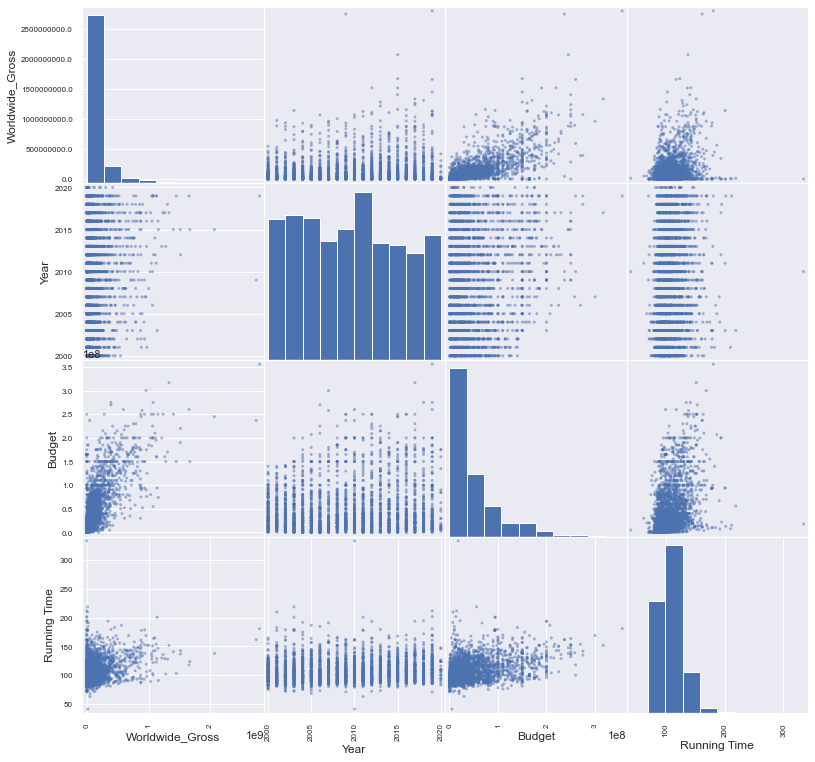

In [45]:
pd.plotting.scatter_matrix(df_budgets[['Worldwide_Gross', 'Year', 'Budget', 'Running Time']], figsize=(13,13));

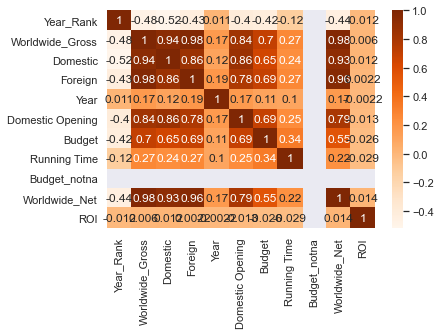

In [46]:
sns.heatmap(df_budgets.corr(), cmap='Oranges', annot=True);

## Movies that made the most in total gross, total over budget, and total ROI

In [47]:
top_25_gross = df.sort_values('Worldwide_Gross', ascending=False)[:25]
top_25_net = df_budgets.sort_values('Worldwide_Net', ascending=False)[:25]
top_25_ROI = df_budgets.sort_values('ROI', ascending=False)[:25]

In [48]:
gross_titles = top_25_gross['Title']
gross_amounts = top_25_gross['Worldwide_Gross']
net_titles = top_25_net['Title']
net_amounts = top_25_net['Worldwide_Gross']
ROI_titles = top_25_ROI['Title']
ROI_per = top_25_ROI['ROI']
ROI_gross = top_25_ROI['Worldwide_Gross']

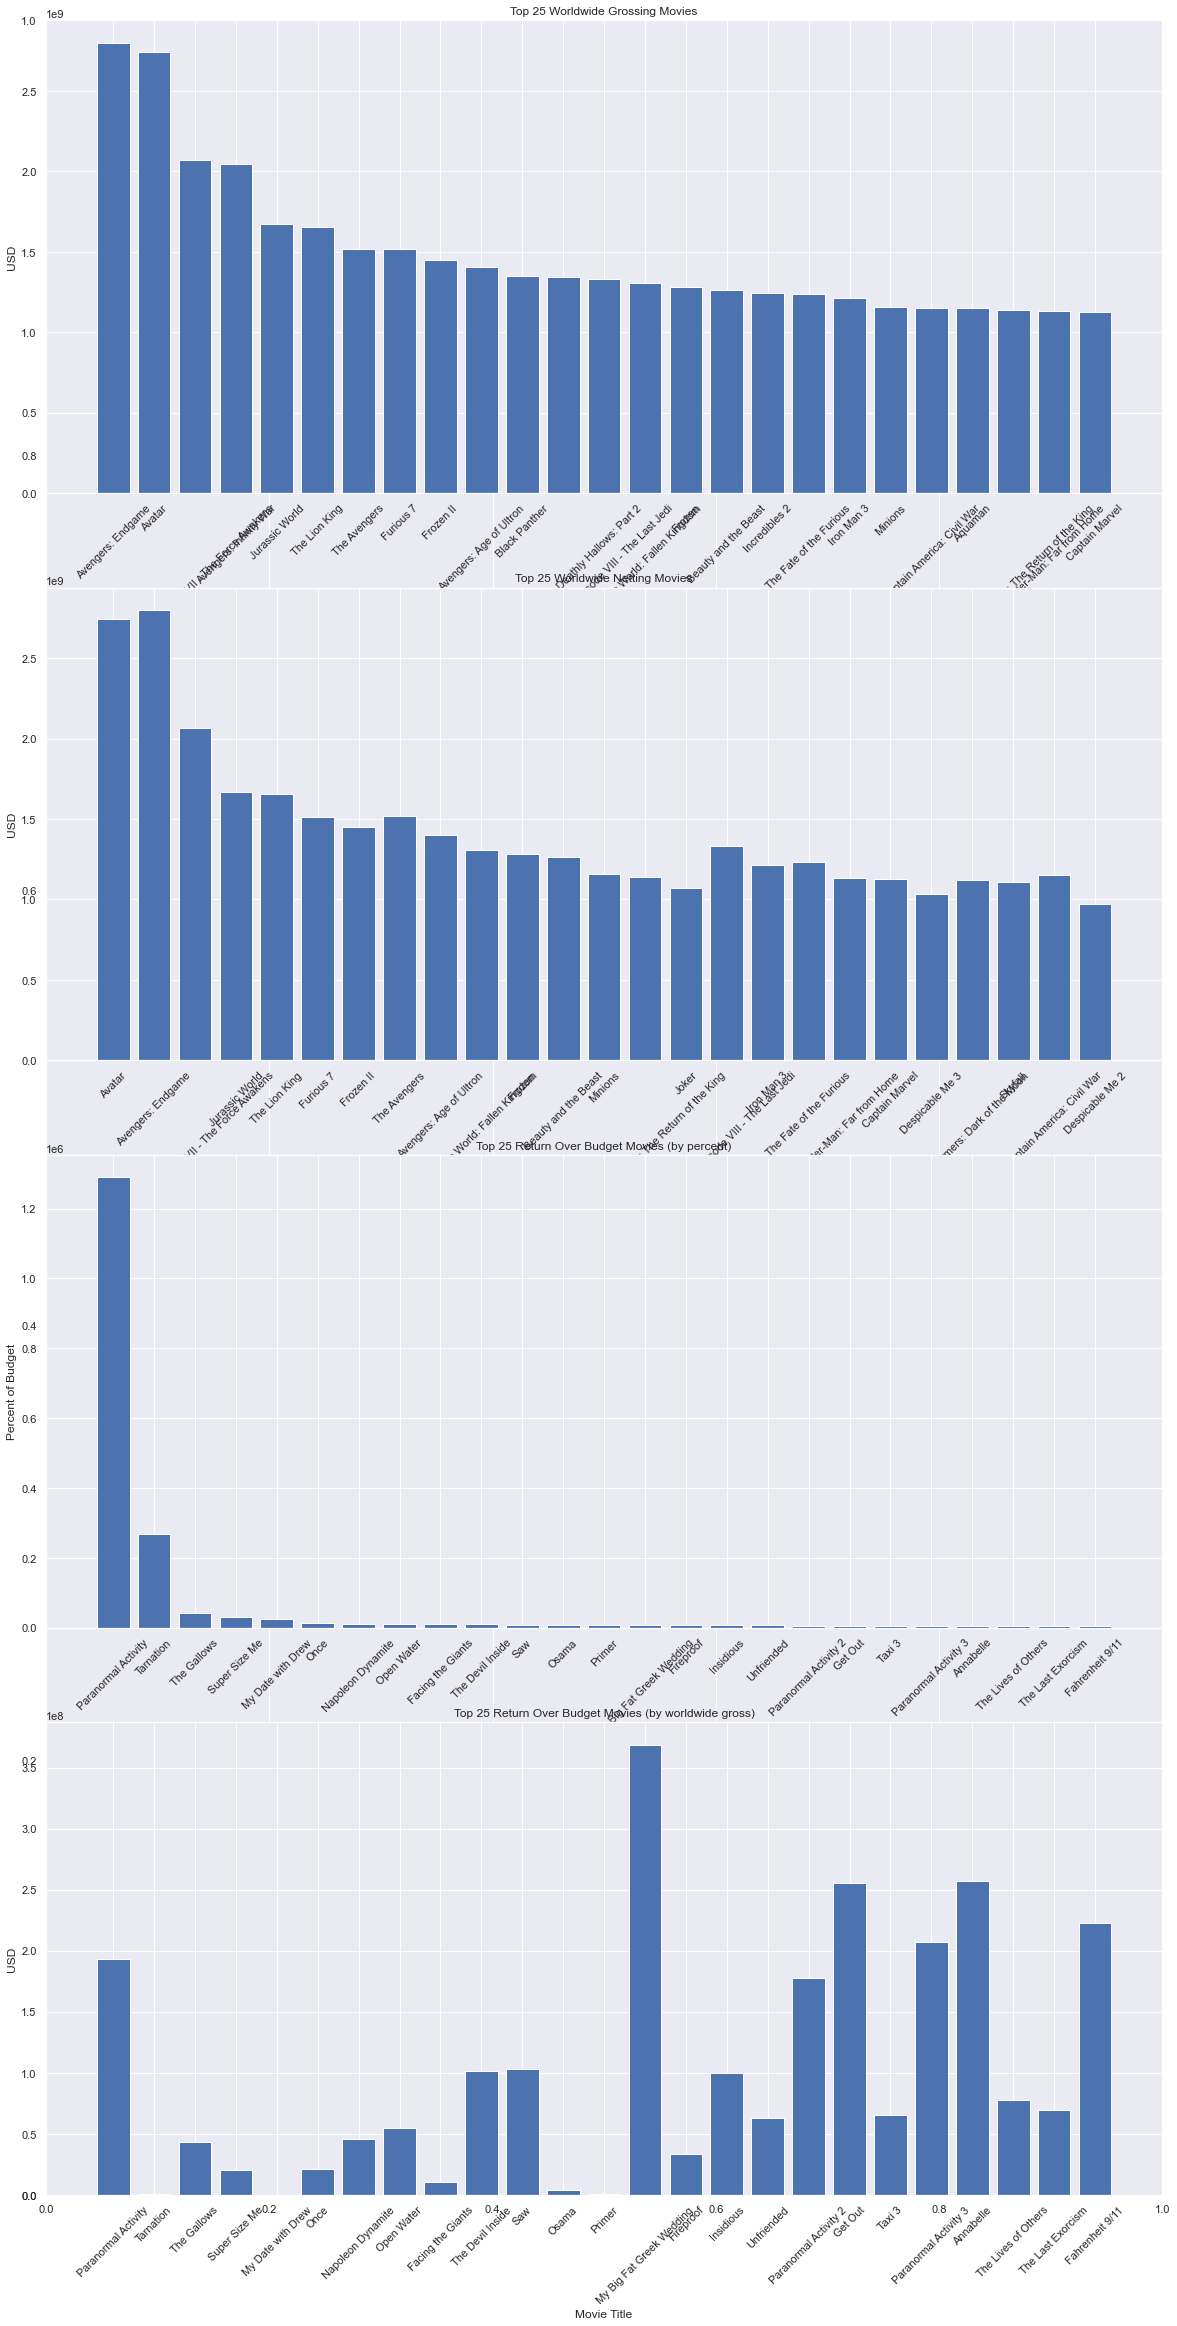

In [49]:
fig, ax = plt.subplots(figsize=(20,40))
ax_gross = fig.add_subplot(411)
ax_gross.bar(gross_titles, gross_amounts)
ax_net = fig.add_subplot(412)
ax_net.bar(net_titles, net_amounts)
ax_ROI_per = fig.add_subplot(413)
ax_ROI_per.bar(ROI_titles, ROI_per)
ax_ROI_gross = fig.add_subplot(414)
ax_ROI_gross.bar(ROI_titles, ROI_gross)

ax_gross.set_title('Top 25 Worldwide Grossing Movies')
ax_net.set_title('Top 25 Worldwide Netting Movies')
ax_ROI_per.set_title('Top 25 Return Over Budget Movies (by percent)')
ax_ROI_gross.set_title('Top 25 Return Over Budget Movies (by worldwide gross)')

ax_gross.set_xlabel('Movie Title')
ax_net.set_xlabel('Movie Title')
ax_ROI_per.set_xlabel('Movie Title')
ax_ROI_gross.set_xlabel('Movie Title')

ax_gross.set_ylabel('USD')
ax_net.set_ylabel('USD')
ax_ROI_per.set_ylabel('Percent of Budget')
ax_ROI_gross.set_ylabel('USD')

ax_gross.tick_params(axis='x', rotation=45)
ax_net.tick_params(axis='x', rotation=45)
ax_ROI_per.tick_params(axis='x', rotation=45)
ax_ROI_gross.tick_params(axis='x', rotation=45)

plt.show();

In [52]:
df_budgets.sort_values('ROI', ascending=False).head(10)

,Year_Rank,Title,Worldwide_Gross,Domestic,Percent_Domestic,Foreign,Percent_Foreign,Year,Domestic Distributor,Domestic Opening,Budget,Earliest Release Date,MPAA,Running Time,Genres,Budget_notna,Earliest Release Month,Worldwide_Net,ROI
9885,32,Paranormal Activity,193355800,107918810,55.8%,85436990,44.2%,2009,Paramount PicturesSee full company information...,77873,15000,"September 25, 2009\n (Domestic)",R,86,"[Horror, Mystery, Thriller]",True,September,193340800,1.289039e+06
12481,309,Tarnation,592014,592014,100%,0,-,2004,Wellspring MediaSee full company information\n\n,12740,220,"October 6, 2004\n (Domestic)",NaN,88,"[Biography, Documentary]",True,October,591794,2.690973e+05
6777,130,The Gallows,42964410,22764410,53%,20200000,47%,2015,Warner Bros.See full company information\n\n,9808463,100000,"July 9, 2015\n (4 markets)",R,81,"[Horror, Mystery, Sci-Fi, Thriller]",True,July,42864410,4.296441e+04
12307,135,Super Size Me,20645757,11536423,55.9%,9109334,44.1%,2004,IDP DistributionSee full company information\n\n,516641,65000,"May 7, 2004\n (Domestic)",PG-13,100,[Documentary],True,May,20580757,3.176270e+04
7718,341,My Date with Drew,262770,181041,68.9%,81729,31.1%,2005,Slowhand Cinema ReleasingSee full company info...,85223,1100,"August 5, 2005\n (Domestic)",PG,90,[Documentary],True,August,261670,2.388818e+04
8720,158,Once,20936722,9439923,45.1%,11496799,54.9%,2007,Fox Searchlight PicturesSee full company infor...,61901,150000,"March 23, 2007\n (United Kingdom)",R,86,"[Drama, Music, Romance]",True,March,20786722,1.395781e+04
12269,97,Napoleon Dynamite,46118097,44540956,96.6%,1577141,3.4%,2004,Fox Searchlight PicturesSee full company infor...,116666,400000,"June 11, 2004\n (Domestic)",PG,96,[Comedy],True,June,45718097,1.152952e+04
12264,92,Open Water,54683487,30610863,56%,24072624,44%,2004,LionsgateSee full company information\n\n,1100943,500000,"August 6, 2004\n (Domestic)",R,79,"[Adventure, Drama, Horror, Thriller]",True,August,54183487,1.093670e+04
8130,198,Facing the Giants,10243159,10178331,99.4%,64828,0.6%,2006,IDP DistributionSee full company information\n\n,1389000,100000,"September 29, 2006\n (Domestic)",PG,111,"[Drama, Fantasy, Sport]",True,September,10143159,1.024316e+04
4595,71,The Devil Inside,101758490,53261944,52.3%,48496546,47.7%,2012,Paramount PicturesSee full company information...,33732515,1000000,"January 6, 2012\n (Domestic)",R,83,[Horror],True,January,100758490,1.017585e+04


In [53]:
df_budgets.shape

(2817, 19)

## Removing Outliers

In [438]:
# q1_net = np.percentile(df_budgets['Worldwide_Net'], 25)
# q3_net = np.percentile(df_budgets['Worldwide_Net'], 75)
# IQR_net = q3_net - q1_net
# minimum_net = q1_net - (IQR_net * 1.5)
# maximum_net = q3_net + (IQR_net * 1.5)

In [440]:
# df_net_fixed = df_budgets[(df_budgets['Worldwide_Net'] >= minimum_net) & (df_budgets['Worldwide_Net'] <= maximum_net)]

In [473]:
# df_net_fixed.sort_values('Worldwide_Net', ascending=False).head()

In [474]:
# df_net_fixed.shape

In [457]:
# df_budgets_fixed = pd.merge(df_net_fixed, df_roi_fixed, on=['Year_Rank','Title', 'Worldwide_Gross', 'Domestic', 
#                                                             'Percent_Domestic', 'Foreign', 'Percent_Foreign', 'Year', 
#                                                             'Domestic Distributor', 'Domestic Opening', 'Budget', 
#                                                             'Earliest Release Date', 'MPAA', 'Running Time', 
#                                                             'Budget_notna', 'Earliest Release Month', 
#                                                             'Worldwide_Net', 'ROI'], how='inner')


In [476]:
# df_budgets_fixed.head(10)

In [475]:
# df_budgets_fixed.shape

In [477]:
# df_budgets_fixed.columns

In [461]:
# df_budgets_fixed.drop(columns='Genres_y', inplace=True)
# df_budgets_fixed.rename(columns={'Genres_x': 'Genres'}, inplace=True)

In [478]:
# df_budgets_fixed.head()

# Q1: What should the budget be?

## Looking at ROI and Worldwide Net

Return on investment(ROI) is a more meaningful metric than strict gross income of the movie as it is possible to have a movie that does well but doesn't actually make any money. However, it is still important to look at how much the movie made in general. A movie with a large ROI but a small budget overall doesn't return that much money when looking at bulk of dollars. Ideally you would want to maximize your ROI and also the net amount that you make off of the movie.

I started by look at the trend between Budget and the total net of the movies.

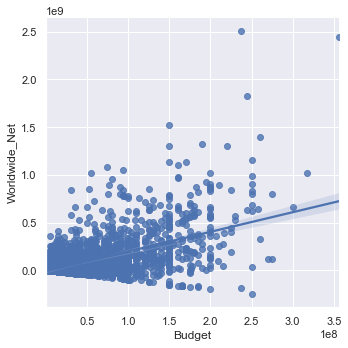

In [50]:
g = sns.lmplot(x="Budget", y="Worldwide_Net",
               height=5, data=df_budgets)

Then I looked at the trend between budget and ROI.

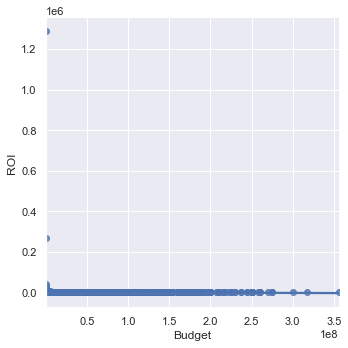

In [51]:
g = sns.lmplot(x="Budget", y="ROI",
               height=5, data=df_budgets)

There are some extreme outliers in the ROI category so I updated my DataFrame to remove them.

In [280]:
q1_roi = np.percentile(df_budgets['ROI'], 25)
q3_roi = np.percentile(df_budgets['ROI'], 75)
IQR_roi = q3_roi - q1_roi
minimum_roi = q1_roi - (IQR_roi * 1.5)
maximum_roi = q3_roi + (IQR_roi * 1.5)

In [72]:
df_roi_fixed = df_budgets[(df_budgets['ROI'] >= minimum_roi) & (df_budgets['ROI'] <= maximum_roi)]

I checked the shape to see how many values I lost. I still have a hearty amount of values.

In [73]:
df_roi_fixed.shape

(2621, 19)

Looking at the ROI column now I can see that these values are much more reasonable to work with.

In [56]:
df_roi_fixed.sort_values('ROI', ascending=False).head()

,Year_Rank,Title,Worldwide_Gross,Domestic,Percent_Domestic,Foreign,Percent_Foreign,Year,Domestic Distributor,Domestic Opening,Budget,Earliest Release Date,MPAA,Running Time,Genres,Budget_notna,Earliest Release Month,Worldwide_Net,ROI
199,40,The Addams Family,203044905,100044905,49.3%,103000000,50.7%,2019,United Artists ReleasingSee full company infor...,30300007,24000000,"October 11, 2019\n (Domestic, EMEA)",PG,86,"[Animation, Comedy, Family, Fantasy, Horror]",True,October,179044905,846.020437
2594,13,Sing,634151679,270395425,42.6%,363756254,57.4%,2016,Universal PicturesSee full company information...,35258145,75000000,"December 2, 2016\n (Norway)",PG,108,"[Animation, Comedy, Family, Musical]",True,December,559151679,845.535572
6648,1,Star Wars: Episode VII - The Force Awakens,2068223624,936662225,45.3%,1131561399,54.7%,2015,Walt Disney Studios,247966675,245000000,"December 16, 2015\n (EMEA, APAC)",PG-13,138,"[Action, Adventure, Sci-Fi]",True,December,1823223624,844.172908
12205,33,Dodgeball,168423227,114326736,67.9%,54096491,32.1%,2004,Twentieth Century FoxSee full company informat...,30070196,20000000,"June 18, 2004\n (Domestic)",PG-13,92,"[Comedy, Sport]",True,June,148423227,842.116135
7517,140,Hustle & Flow,23563727,22202809,94.2%,1360918,5.8%,2005,Paramount ClassicsSee full company information...,8017808,2800000,"July 22, 2005\n (Domestic)",R,116,"[Crime, Drama, Music]",True,July,20763727,841.561679


## ROI vs Net

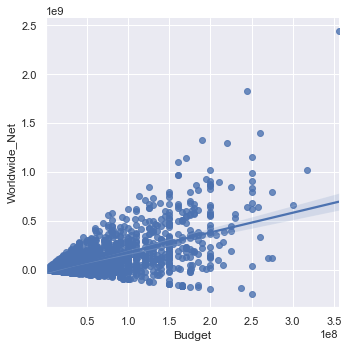

In [59]:
g = sns.lmplot(x="Budget", y="Worldwide_Net",
               height=5, data=df_roi_fixed)

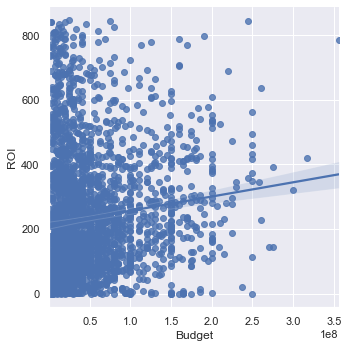

In [60]:
g = sns.lmplot(x="Budget", y="ROI",
               height=5, data=df_roi_fixed)

The ultimate goal is for movies to maximize ROI and net. There is a positive trend between ROI increasing and the total the movie nets.

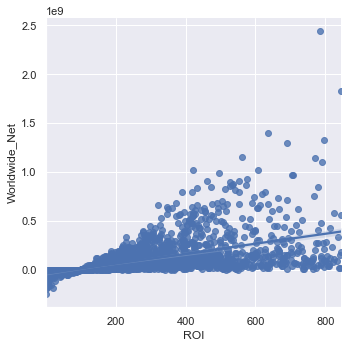

In [61]:
g = sns.lmplot(x="ROI", y="Worldwide_Net",
               height=5, data=df_roi_fixed)

I decided to take a slice of the top right of this graph and look at the movies that are in the 90th percentile for both ROI and Net

In [62]:
roi_90 = np.percentile(df_roi_fixed['ROI'], 90)
net_90 = np.percentile(df_roi_fixed['Worldwide_Net'], 90)
roi_median = df_roi_fixed['ROI'].median()
net_median = df_roi_fixed['Worldwide_Net'].median()

In [63]:
df_sweetspot = df_roi_fixed[(df_roi_fixed['ROI'] > roi_90) & (df_roi_fixed['Worldwide_Net'] > net_90)]
df_sweetspot.shape

(91, 19)

In [64]:
df_sweetspot.describe()

,Year_Rank,Worldwide_Gross,Domestic,Foreign,Year,Domestic Opening,Budget,Running Time,Worldwide_Net,ROI
count,91.000000,9.100000e+01,9.100000e+01,9.100000e+01,91.000000,9.100000e+01,9.100000e+01,91.000000,9.100000e+01,91.000000
mean,10.054945,7.062731e+08,2.745657e+08,4.317074e+08,2011.274725,7.881276e+07,1.101319e+08,120.626374,5.961412e+08,649.754703
std,8.003281,4.242949e+08,1.508131e+08,2.936781e+08,6.000122,5.810028e+07,6.217113e+07,21.913288,3.654862e+08,95.060079
min,1.000000,2.699582e+08,2.683007e+07,7.921172e+07,2000.000000,0.000000e+00,3.300000e+07,81.000000,2.369582e+08,517.701270
25%,3.500000,3.891509e+08,1.707149e+08,2.390989e+08,2006.000000,3.981614e+07,6.100000e+07,105.000000,3.288436e+08,568.953578
50%,8.000000,5.423514e+08,2.428293e+08,3.412000e+08,2012.000000,6.278534e+07,9.000000e+07,118.000000,4.614143e+08,638.166429
75%,15.000000,9.123409e+08,3.447632e+08,5.399464e+08,2017.000000,1.029687e+08,1.500000e+08,138.000000,7.670566e+08,711.337012
max,31.000000,2.797801e+09,9.366622e+08,1.939428e+09,2019.000000,3.571150e+08,3.560000e+08,181.000000,2.441801e+09,845.535572


In [65]:
df_sweetspot['Budget'].mean()

110131868.13186814

In [66]:
df_roi_fixed['Budget'].mean()

50811204.94048073

In [67]:
df_sweetspot['Budget'].median()

90000000.0

In [68]:
df_roi_fixed['Budget'].median()

33000000.0

## Add a plotly graph for showing the sweetspot entries

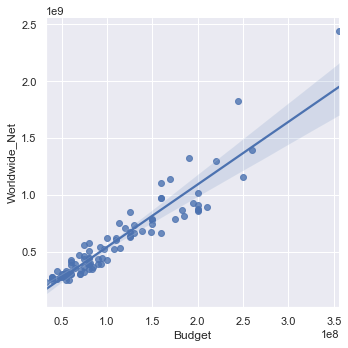

In [69]:
g = sns.lmplot(x="Budget", y="Worldwide_Net",
               height=5, data=df_sweetspot)

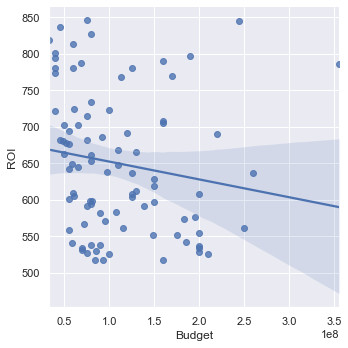

In [70]:
g = sns.lmplot(x="Budget", y="ROI",
               height=5, data=df_sweetspot)

## Recommendation: Budget should be between 90 million and 110 million USD

For movies in the 90th percentile for both ROI and net, the median budgets were 90 million and the average budgets were 110 million. So to maximize the chances of having high ROI and net, that range is your best bet.

# Q2: What genre should the movie be?

In [ ]:
# df_budgets
# df_roi_fixed

In [177]:
df_budgets.columns

Index(['Year_Rank', 'Title', 'Worldwide_Gross', 'Domestic', 'Percent_Domestic',
       'Foreign', 'Percent_Foreign', 'Year', 'Domestic Distributor',
       'Domestic Opening', 'Budget', 'Earliest Release Date', 'MPAA',
       'Running Time', 'Genres', 'Budget_notna', 'Earliest Release Month',
       'Worldwide_Net', 'ROI'],
      dtype='object')

In [178]:
df_genres_net = df_budgets.explode('Genres')
df_genres_roi = df_roi_fixed.explode('Genres')

In [179]:
df_genres_net.head()

,Year_Rank,Title,Worldwide_Gross,Domestic,Percent_Domestic,Foreign,Percent_Foreign,Year,Domestic Distributor,Domestic Opening,Budget,Earliest Release Date,MPAA,Running Time,Genres,Budget_notna,Earliest Release Month,Worldwide_Net,ROI
0,1,Bad Boys for Life,419074646,204417855,48.8%,214656791,51.2%,2020,Sony Pictures Entertainment (SPE)See full comp...,62504105,90000000,"January 15, 2020\n (LATAM, APAC)",R,124,Action,True,January,329074646,465.638496
0,1,Bad Boys for Life,419074646,204417855,48.8%,214656791,51.2%,2020,Sony Pictures Entertainment (SPE)See full comp...,62504105,90000000,"January 15, 2020\n (LATAM, APAC)",R,124,Comedy,True,January,329074646,465.638496
0,1,Bad Boys for Life,419074646,204417855,48.8%,214656791,51.2%,2020,Sony Pictures Entertainment (SPE)See full comp...,62504105,90000000,"January 15, 2020\n (LATAM, APAC)",R,124,Crime,True,January,329074646,465.638496
0,1,Bad Boys for Life,419074646,204417855,48.8%,214656791,51.2%,2020,Sony Pictures Entertainment (SPE)See full comp...,62504105,90000000,"January 15, 2020\n (LATAM, APAC)",R,124,Thriller,True,January,329074646,465.638496
1,2,Sonic the Hedgehog,306766470,146066470,47.6%,160700000,52.4%,2020,Paramount PicturesSee full company information...,58018348,85000000,"February 12, 2020\n (APAC, EMEA)",PG,99,Action,True,February,221766470,360.901729


In [180]:
df_genres_net['Genres'].value_counts()

Drama          1344
Comedy         1110
Action          840
Thriller        840
Adventure       706
Romance         596
Crime           500
Fantasy         467
Family          430
Sci-Fi          416
Mystery         344
Horror          325
Animation       211
Biography       179
Music           114
War             110
History         110
Musical         100
Sport            97
Documentary      36
Western          36
News              2
Short             1
Name: Genres, dtype: int64

In [265]:
df_genres_net = df_genres_net[(df_genres_net['Genres'] != 'Short')]
df_genres_net = df_genres_net[(df_genres_net['Genres'] != 'News')]
df_genres_net = df_genres_net[(df_genres_net['Genres'] != 'Western')]
df_genres_net = df_genres_net[(df_genres_net['Genres'] != 'Documentary')]
df_genres_net = df_genres_net[(df_genres_net['Genres'] != 'Sport')]
df_genres_net = df_genres_net[(df_genres_net['Genres'] != 'Musical')]
df_genres_net = df_genres_net[(df_genres_net['Genres'] != 'War')]
df_genres_net = df_genres_net[(df_genres_net['Genres'] != 'History')]
df_genres_net = df_genres_net[(df_genres_net['Genres'] != 'Music')]
df_genres_net = df_genres_net[(df_genres_net['Genres'] != 'Biography')]

In [266]:
df_genres_net['Genres'].value_counts()

Drama        1344
Comedy       1110
Action        840
Thriller      840
Adventure     706
Romance       596
Crime         500
Fantasy       467
Family        430
Sci-Fi        416
Mystery       344
Horror        325
Animation     211
Name: Genres, dtype: int64

In [202]:
df_genres_roi = df_genres_roi[(df_genres_roi['Genres'] != 'Short')]
df_genres_roi = df_genres_roi[(df_genres_roi['Genres'] != 'News')]
df_genres_roi = df_genres_roi[(df_genres_roi['Genres'] != 'Western')]
df_genres_roi = df_genres_roi[(df_genres_roi['Genres'] != 'Documentary')]
df_genres_roi = df_genres_roi[(df_genres_roi['Genres'] != 'Sport')]
df_genres_roi = df_genres_roi[(df_genres_roi['Genres'] != 'Musical')]
df_genres_roi = df_genres_roi[(df_genres_roi['Genres'] != 'War')]
df_genres_roi = df_genres_roi[(df_genres_roi['Genres'] != 'History')]
df_genres_roi = df_genres_roi[(df_genres_roi['Genres'] != 'Music')]
df_genres_roi = df_genres_roi[(df_genres_roi['Genres'] != 'Biography')]

In [321]:
df_genres_roi['Genres'].value_counts()

Drama        1246
Comedy       1050
Action        816
Thriller      773
Adventure     676
Romance       556
Crime         487
Fantasy       442
Family        412
Sci-Fi        393
Mystery       299
Horror        261
Animation     200
Name: Genres, dtype: int64

In [ ]:
# line 1 points
x1 = [10,20,30]
y1 = [20,40,10]
# plotting the line 1 points 
plt.plot(x1, y1, label = "line 1")
# line 2 points
x2 = [10,20,30]
y2 = [40,10,30]
# plotting the line 2 points 
plt.plot(x2, y2, label = "line 2")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Two or more lines on same plot with suitable legends ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()


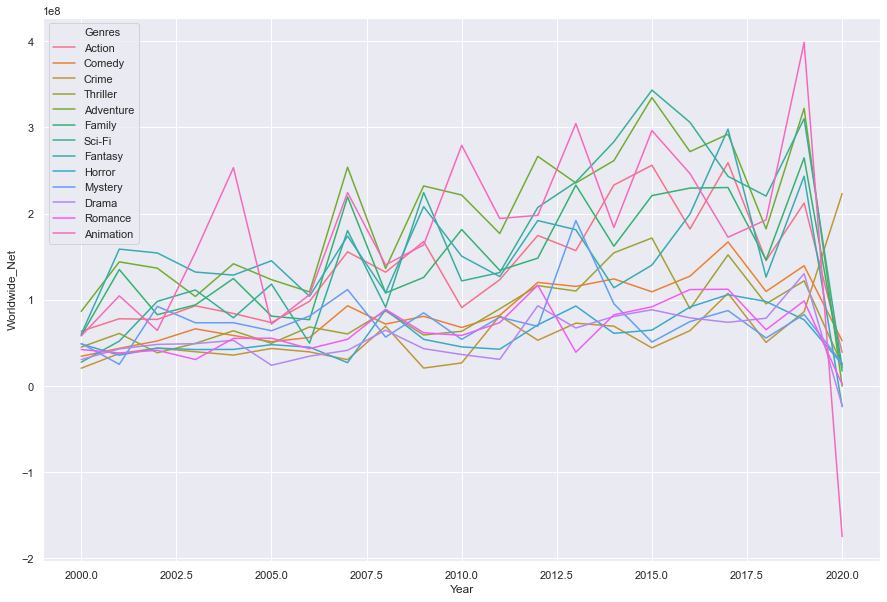

In [267]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x='Year', y='Worldwide_Net', hue='Genres', 
             data=df_genres_net, err_style=None);

In [316]:
q1_gen = np.percentile(df_genres_net['Worldwide_Net'], 25)
q3_gen = np.percentile(df_genres_net['Worldwide_Net'], 75)
IQR_gen = q3_gen - q1_gen
minimum_gen = q1_gen - (IQR_gen * 1.5)
maximum_gen = q3_gen + (IQR_gen * 1.5)

In [317]:
df_gen_fixed = df_genres_net[(df_genres_net['Worldwide_Net'] >= minimum_gen) 
                             & (df_genres_net['Worldwide_Net'] <= maximum_gen)]

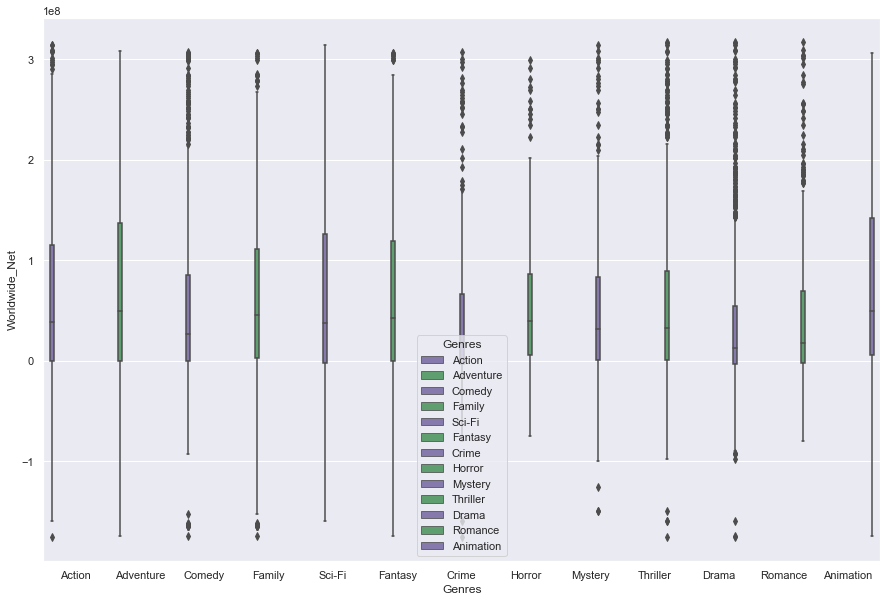

In [319]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x="Genres", y="Worldwide_Net",
            hue="Genres", palette=["m", "g"],
            data=df_gen_fixed);

In [268]:
df_genres_net.groupby(['Year','Genres'])['Worldwide_Net'].mean()

Year  Genres   
2000  Action        63590945.175
      Adventure     86580084.676
      Animation     58156832.636
      Comedy        34500077.842
      Crime         20635957.743
      Drama         30741237.205
      Family        58569030.278
      Fantasy       60181910.368
      Horror        48672078.923
      Mystery       49346495.769
      Romance       42343998.833
      Sci-Fi        27658289.947
      Thriller      45122037.578
2001  Action        78016655.744
      Adventure    143981290.500
      Animation    104583219.556
      Comedy        43723152.239
      Crime         37702453.629
      Drama         43049348.000
      Family       135073640.118
      Fantasy      158779241.381
      Horror        35791466.154
      Mystery       25198365.864
      Romance       38296189.462
      Sci-Fi        52046512.950
      Thriller      60986603.933
2002  Action        77223756.070
      Adventure    136667254.526
      Animation     64439490.091
      Comedy        5221409

In [269]:
df_genres_net.groupby(['Genres'])['Worldwide_Net'].mean()

Genres
Action      144422260.880
Adventure   202908646.373
Animation   190050921.986
Comedy       81303716.817
Crime        49758373.718
Drama        55672615.414
Family      145289940.319
Fantasy     158670067.619
Horror       61698920.914
Mystery      73893149.802
Romance      61872624.968
Sci-Fi      180244187.899
Thriller     85033491.431
Name: Worldwide_Net, dtype: float64

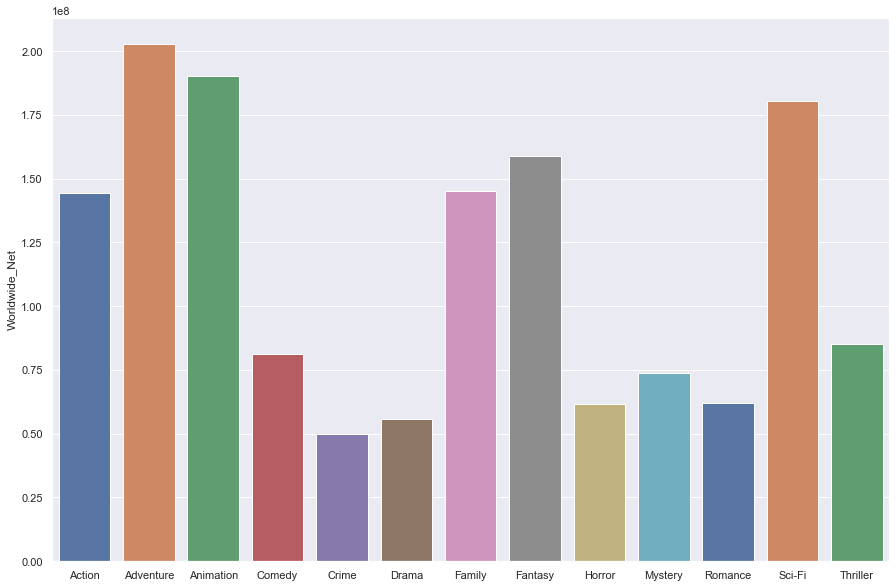

In [271]:
y = df_genres_net.groupby(['Genres'])['Worldwide_Net'].mean()
x = ['Action', 'Adventure', 'Animation', 'Comedy', 
     'Crime', 'Drama', 'Family', 'Fantasy', 'Horror', 'Mystery', 
     'Romance', 'Sci-Fi', 'Thriller']
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=x, y=y, palette="deep");

# sns.despine(bottom=True)
# plt.setp(f.axes, yticks=[])
# plt.tight_layout(h_pad=2)

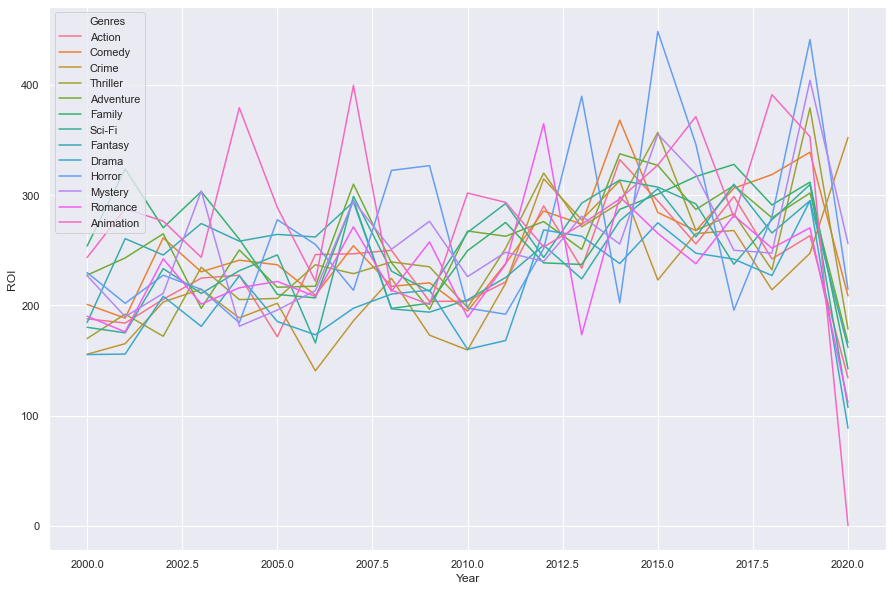

In [279]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x='Year', y='ROI', hue='Genres', 
             data=df_genres_roi, err_style=None);

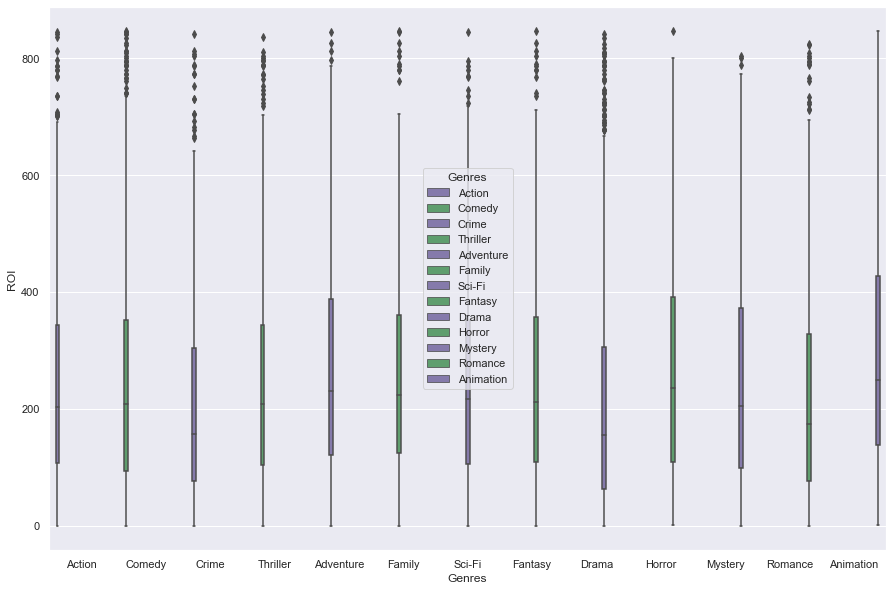

In [320]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x="Genres", y="ROI",
            hue="Genres", palette=["m", "g"],
            data=df_genres_roi);

In [261]:
df_genres_roi.groupby(['Year','Genres'])['ROI'].mean()

Year  Genres   
2000  Action      187.752
      Adventure   227.325
      Animation   243.347
      Comedy      200.822
      Crime       155.605
      Drama       155.316
      Family      253.759
      Fantasy     184.308
      Horror      229.684
      Mystery     226.855
      Romance     190.091
      Sci-Fi      180.040
      Thriller    169.880
2001  Action      183.897
      Adventure   242.981
      Animation   287.602
      Comedy      188.378
      Crime       165.205
      Drama       155.784
      Family      323.778
      Fantasy     260.494
      Horror      201.800
      Mystery     189.712
      Romance     175.926
      Sci-Fi      175.039
      Thriller    191.980
2002  Action      205.470
      Adventure   264.856
      Animation   276.375
      Comedy      261.125
      Crime       203.014
      Drama       208.181
      Family      270.332
      Fantasy     245.599
      Horror      227.295
      Mystery     210.834
      Romance     242.189
      Sci-Fi      233.

In [262]:
df_genres_roi.groupby(['Genres'])['ROI'].mean()

Genres
Action      238.938
Adventure   262.518
Animation   288.719
Comedy      247.386
Crime       210.357
Drama       207.488
Family      260.928
Fantasy     250.268
Horror      269.634
Mystery     254.253
Romance     226.971
Sci-Fi      250.559
Thriller    241.377
Name: ROI, dtype: float64

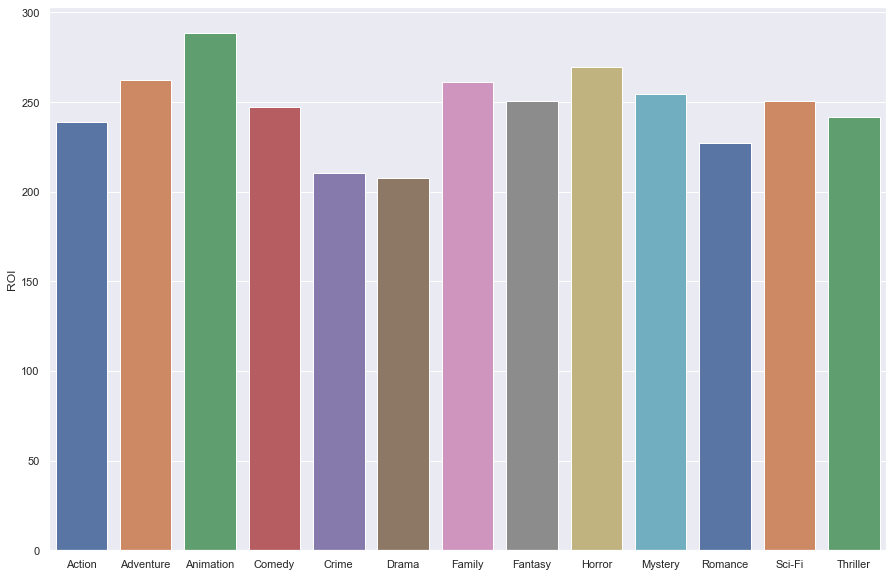

In [272]:
y = df_genres_roi.groupby(['Genres'])['ROI'].mean()
x = ['Action', 'Adventure', 'Animation', 'Comedy', 
     'Crime', 'Drama', 'Family', 'Fantasy', 'Horror', 'Mystery', 
     'Romance', 'Sci-Fi', 'Thriller']
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=x, y=y, palette="deep");

In [252]:
df_genres_sub = df_genres_net[(df_genres_net['Genres'] == 'Sci-Fi') | (df_genres_net['Genres'] == 'Adventure')
                             | (df_genres_net['Genres'] == 'Animation') | (df_genres_net['Genres'] == 'Action')
                             | (df_genres_net['Genres'] == 'Family') | (df_genres_net['Genres'] == 'Fantasy')]


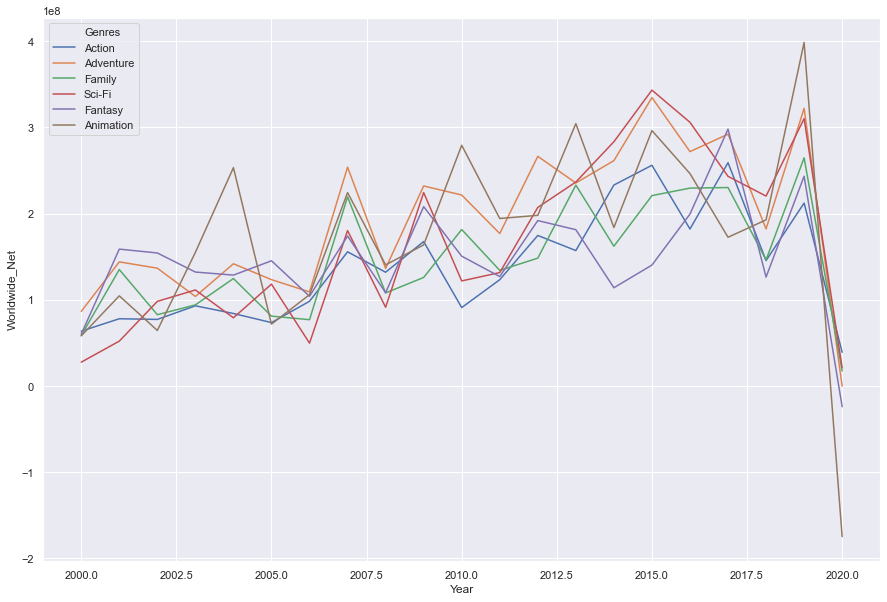

In [253]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x='Year', y='Worldwide_Net', hue='Genres', 
             data=df_genres_sub, err_style=None);

In [312]:
q1_gen = np.percentile(df_genres_sub['Worldwide_Net'], 25)
q3_gen = np.percentile(df_genres_sub['Worldwide_Net'], 75)
IQR_gen = q3_gen - q1_gen
minimum_gen = q1_gen - (IQR_gen * 1.5)
maximum_gen = q3_gen + (IQR_gen * 1.5)

In [313]:
df_gen_fixed = df_genres_sub[(df_genres_sub['Worldwide_Net'] >= minimum_gen) 
                             & (df_genres_sub['Worldwide_Net'] <= maximum_gen)]

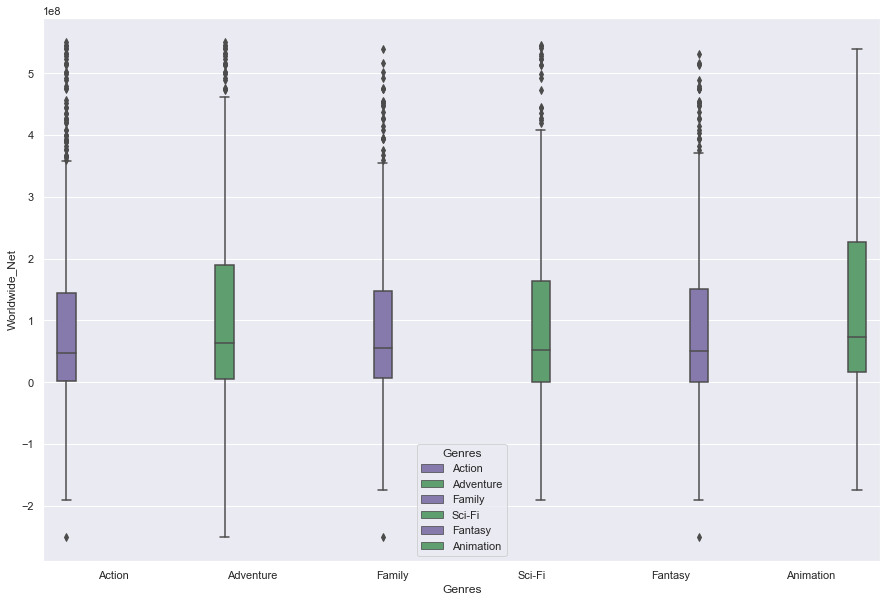

In [314]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x="Genres", y="Worldwide_Net",
            hue="Genres", palette=["m", "g"],
            data=df_gen_fixed);

## Stacked bar chart showing different genres over the years based on net gross

# Q3: What is the best release month?

In [327]:
df.head()

,Year_Rank,Title,Worldwide_Gross,Domestic,Percent_Domestic,Foreign,Percent_Foreign,Year,Domestic Distributor,Domestic Opening,Budget,Earliest Release Date,MPAA,Running Time,Genres,Budget_notna,Earliest Release Month
0,1,Bad Boys for Life,419074646,204417855,48.8%,214656791,51.2%,2020,Sony Pictures Entertainment (SPE)See full comp...,62504105,90000000,"January 15, 2020\n (LATAM, APAC)",R,124,"[Action, Comedy, Crime, Thriller]",True,January
1,2,Sonic the Hedgehog,306766470,146066470,47.6%,160700000,52.4%,2020,Paramount PicturesSee full company information...,58018348,85000000,"February 12, 2020\n (APAC, EMEA)",PG,99,"[Action, Adventure, Comedy, Family, Sci-Fi]",True,February
2,3,Dolittle,224752486,77047065,34.3%,147705421,65.7%,2020,Universal PicturesSee full company information...,21844045,175000000,"January 8, 2020\n (South Korea)",PG,101,"[Adventure, Comedy, Family, Fantasy]",True,January
3,4,Birds of Prey: And the Fantabulous Emancipatio...,201858461,84158461,41.7%,117700000,58.3%,2020,Warner Bros.See full company information\n\n,33010017,84500000,"February 5, 2020\n (APAC, EMEA)",R,109,"[Action, Adventure, Crime]",True,February
4,5,The Invisible Man,128251913,64914050,50.6%,63337863,49.4%,2020,Universal PicturesSee full company information...,28205665,7000000,"February 26, 2020\n (EMEA, APAC)",R,124,"[Horror, Mystery, Sci-Fi, Thriller]",True,February


In [328]:
df_budgets.head()

,Year_Rank,Title,Worldwide_Gross,Domestic,Percent_Domestic,Foreign,Percent_Foreign,Year,Domestic Distributor,Domestic Opening,Budget,Earliest Release Date,MPAA,Running Time,Genres,Budget_notna,Earliest Release Month,Worldwide_Net,ROI
0,1,Bad Boys for Life,419074646,204417855,48.8%,214656791,51.2%,2020,Sony Pictures Entertainment (SPE)See full comp...,62504105,90000000,"January 15, 2020\n (LATAM, APAC)",R,124,"[Action, Comedy, Crime, Thriller]",True,January,329074646,465.638
1,2,Sonic the Hedgehog,306766470,146066470,47.6%,160700000,52.4%,2020,Paramount PicturesSee full company information...,58018348,85000000,"February 12, 2020\n (APAC, EMEA)",PG,99,"[Action, Adventure, Comedy, Family, Sci-Fi]",True,February,221766470,360.902
2,3,Dolittle,224752486,77047065,34.3%,147705421,65.7%,2020,Universal PicturesSee full company information...,21844045,175000000,"January 8, 2020\n (South Korea)",PG,101,"[Adventure, Comedy, Family, Fantasy]",True,January,49752486,128.430
3,4,Birds of Prey: And the Fantabulous Emancipatio...,201858461,84158461,41.7%,117700000,58.3%,2020,Warner Bros.See full company information\n\n,33010017,84500000,"February 5, 2020\n (APAC, EMEA)",R,109,"[Action, Adventure, Crime]",True,February,117358461,238.886
4,5,The Invisible Man,128251913,64914050,50.6%,63337863,49.4%,2020,Universal PicturesSee full company information...,28205665,7000000,"February 26, 2020\n (EMEA, APAC)",R,124,"[Horror, Mystery, Sci-Fi, Thriller]",True,February,121251913,1832.170


In [339]:
counts = df['Earliest Release Month'].value_counts()
counts_df = counts.to_frame().reset_index()

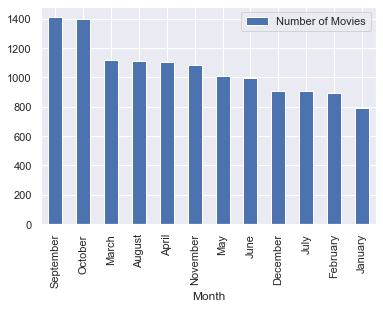

In [343]:
counts_df.columns = ['Month', 'Number of Movies']
counts_df.set_index('Month').plot(kind='bar')

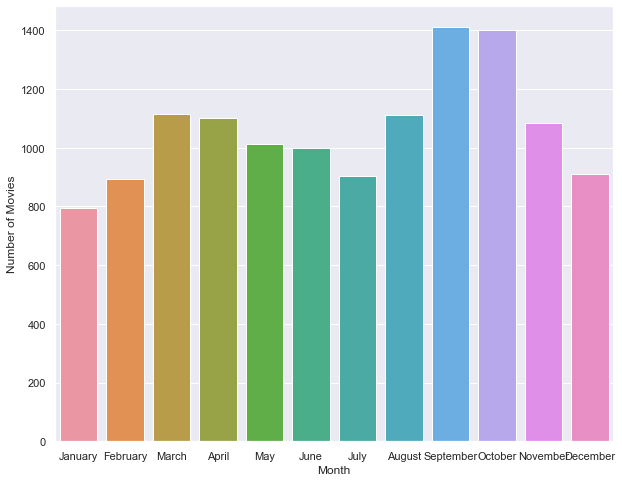

In [356]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
              'September', 'October', 'November', 'December']
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=counts_df, x='Month', y='Number of Movies', order=month_order);

In [383]:
counts_sub = df_budgets['Earliest Release Month'].value_counts()
counts_sub_df = counts_sub.to_frame().reset_index()
counts_sub_df.columns = ['Month', 'Number of Movies']
counts_sub_df.set_index('Month')

,Number of Movies
Month,
October,307
September,268
December,267
August,245
November,238
June,237
April,235
March,225
February,211


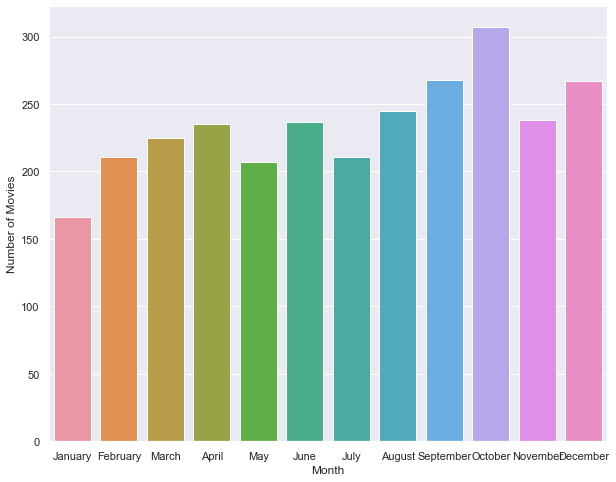

In [385]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
              'September', 'October', 'November', 'December']
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=counts_sub_df, x='Month', y='Number of Movies', order=month_order);

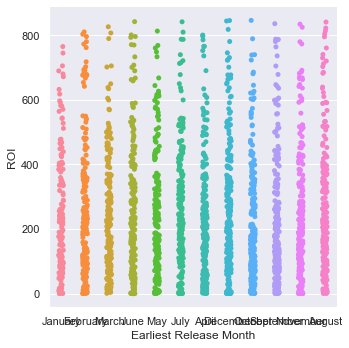

In [330]:
sns.catplot(x="Earliest Release Month", y="ROI", data=df_roi_fixed);

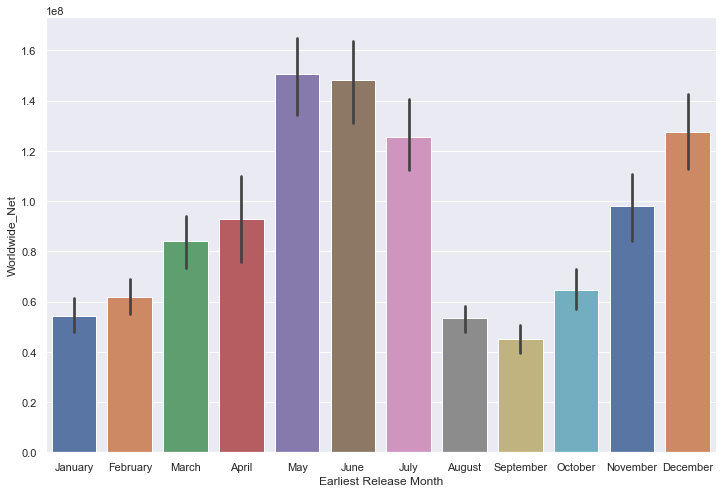

In [353]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
              'September', 'October', 'November', 'December']
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='Earliest Release Month', y='Worldwide_Net', data=df_budgets, ci=68, order=month_order, palette="deep");

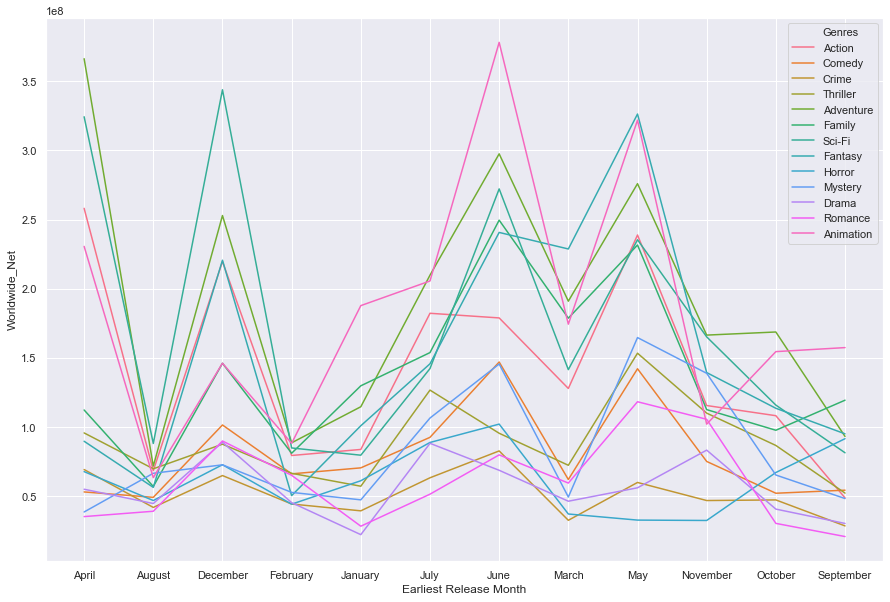

In [298]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x='Earliest Release Month', y='Worldwide_Net', hue='Genres', 
             data=df_genres_net, err_style=None);

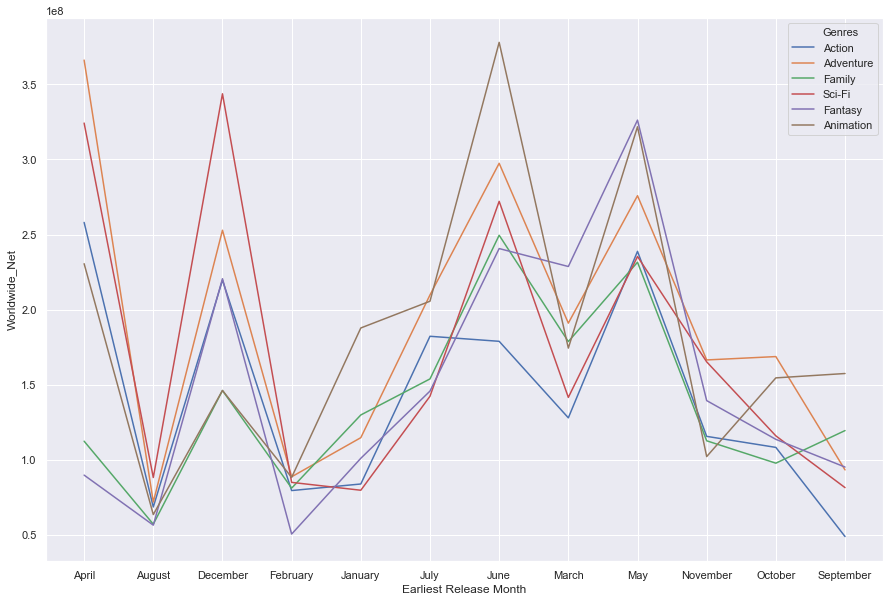

In [310]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x='Earliest Release Month', y='Worldwide_Net', hue='Genres', 
             data=df_genres_sub, err_style=None);

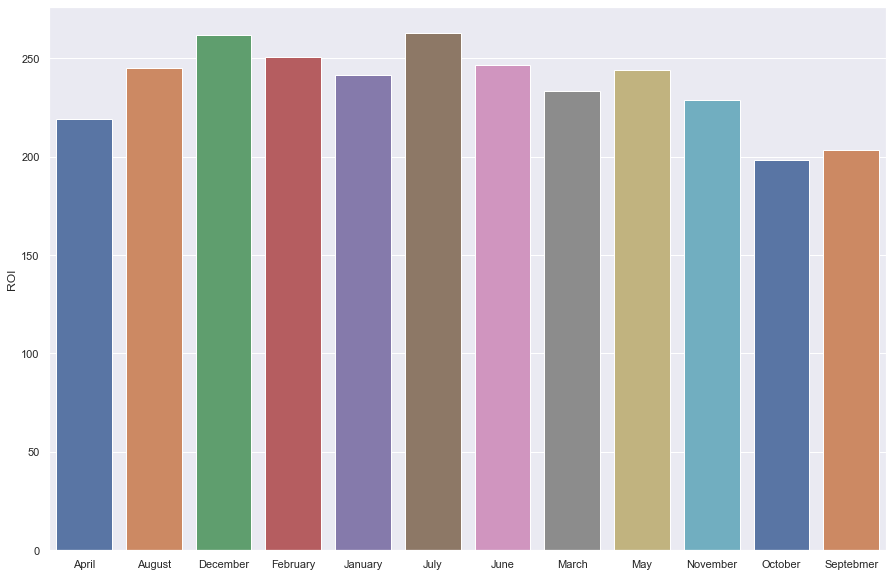

In [306]:
y = df_roi_fixed.groupby(['Earliest Release Month'])['ROI'].mean()
x = ['April', 'August', 'December', 'February', 'January', 'July', 
     'June', 'March', 'May', 'November', 'October', 'Septebmer']
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=x, y=y, palette="deep");

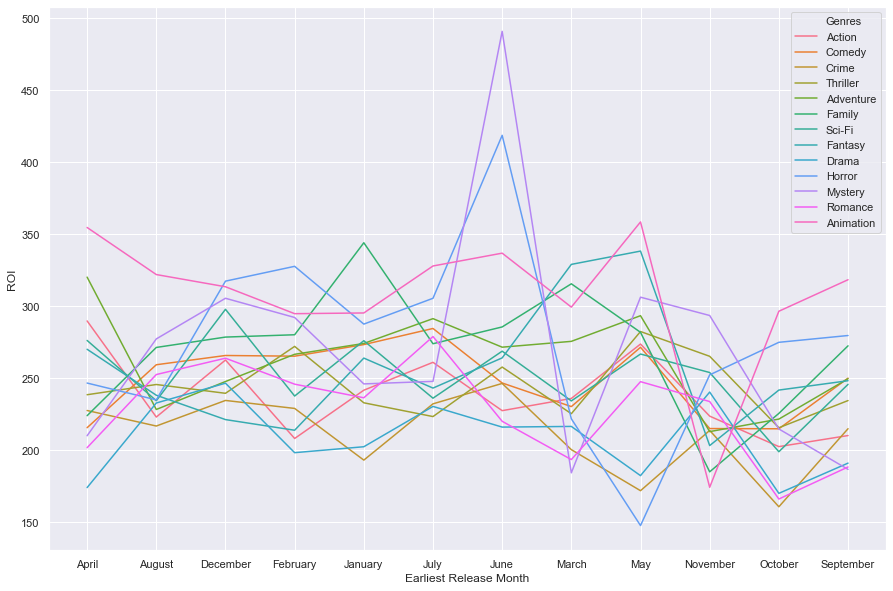

In [300]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x='Earliest Release Month', y='ROI', hue='Genres', 
             data=df_genres_roi, err_style=None);

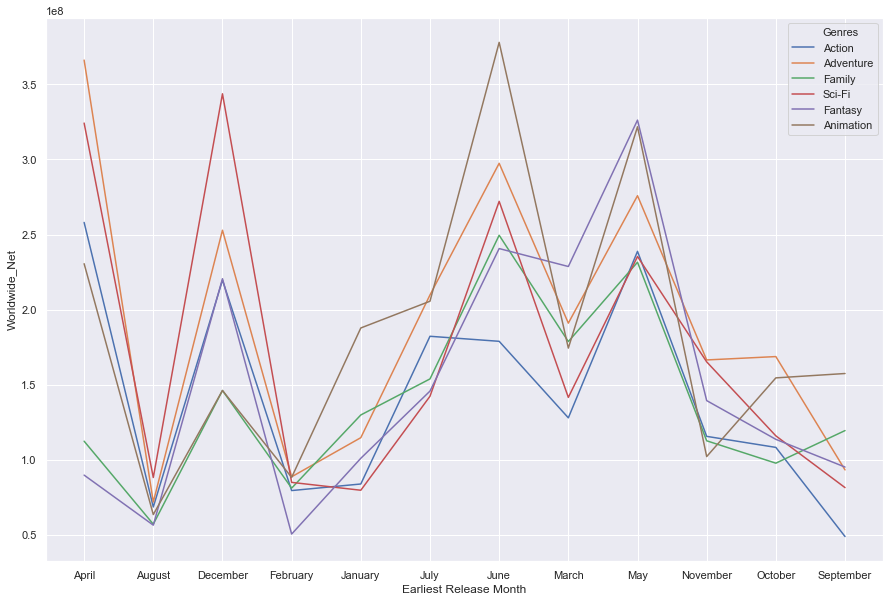

In [299]:
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x='Earliest Release Month', y='Worldwide_Net', hue='Genres', 
             data=df_genres_sub, err_style=None);

## Release month recommendations

Once again we see Adventure, Sci-Fi, Animation, Action, Family, and Fantasy genres top the list in the net gross categories for every month. 

From a net perspective, the worst month to release a movie is September. The best month would be May or June.

From an ROI perspective June is a good month to release a horror or mystery film. 

The best month by genre: 

Action - April

Adventure - April

Animation - June

Family - June

Fantasy - May

Sci-Fi - December


# Q4: What MPAA rating should the movie be?

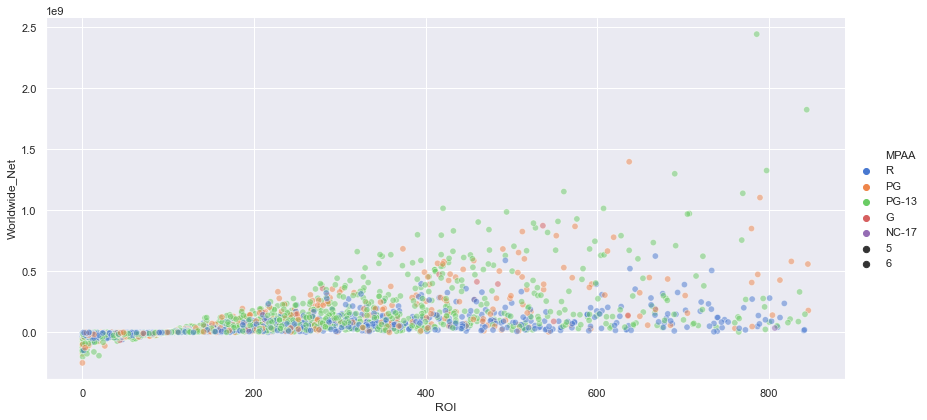

In [246]:
sns.relplot(x="ROI", y="Worldwide_Net", hue="MPAA",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_roi_fixed, size=6, aspect=2);

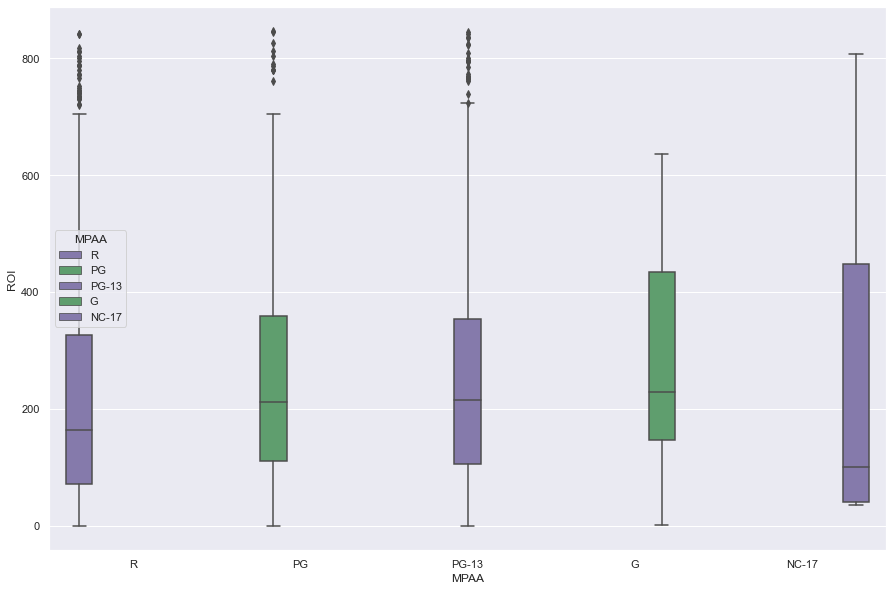

In [235]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x="MPAA", y="ROI",
            hue="MPAA", palette=["m", "g"],
            data=df_roi_fixed);

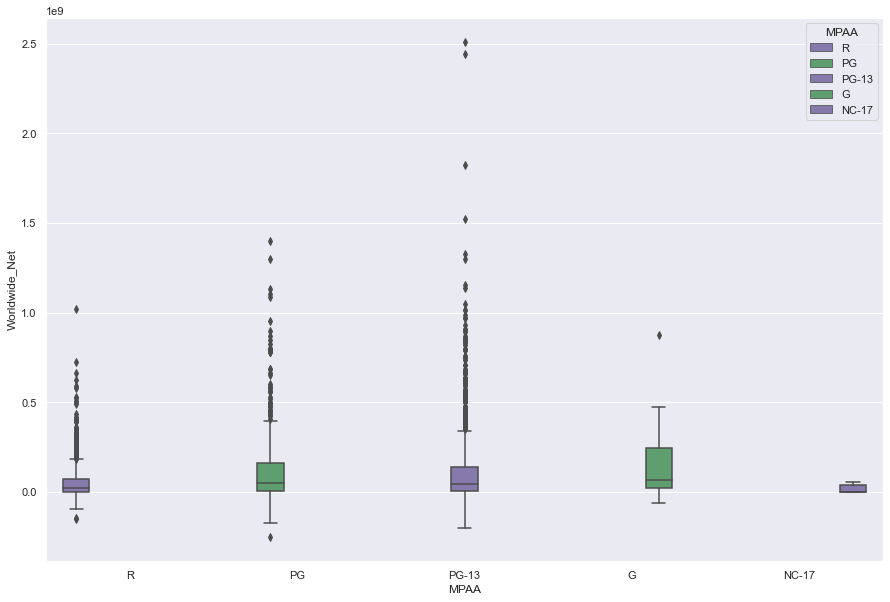

In [248]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x="MPAA", y="Worldwide_Net",
            hue="MPAA", palette=["m", "g"],
            data=df_budgets);

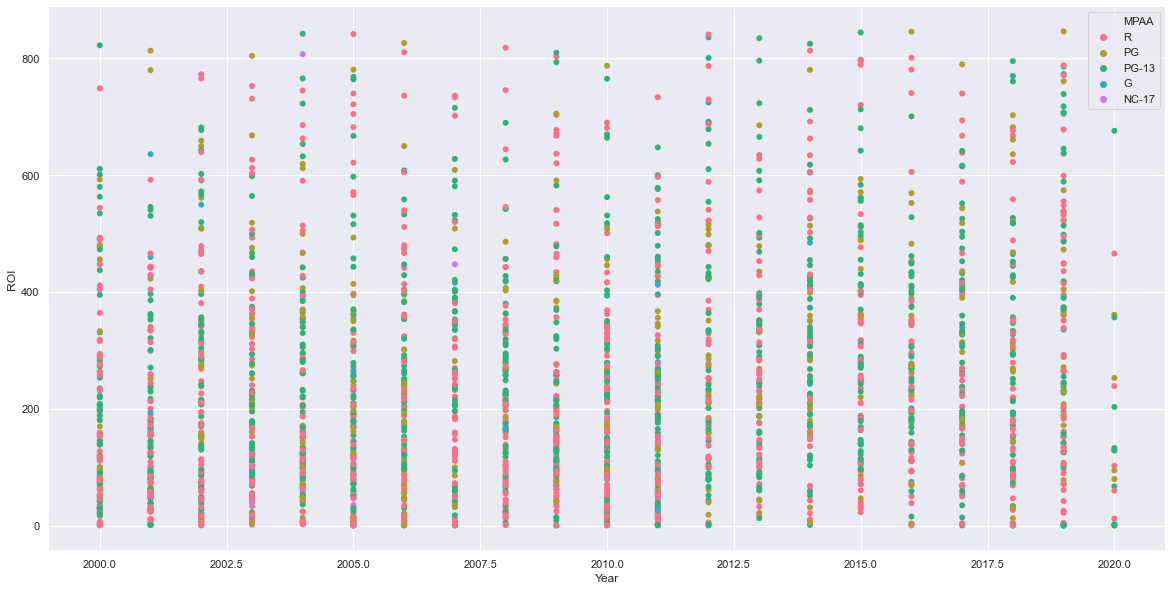

In [230]:
f, ax = plt.subplots(figsize=(20, 10))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="Year", y="ROI",
                hue="MPAA",
                palette="husl",
                sizes=(1, 8), linewidth=0,
                data=df_roi_fixed, ax=ax);

KeyboardInterrupt: 

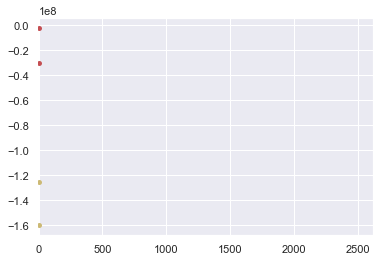

In [74]:
sns.swarmplot(x="ROI", y="Worldwide_Net", hue="MPAA",
              palette=["r", "c", "y"], data=df_roi_fixed)

In [73]:
df_roi_fixed['MPAA'] = df_roi_fixed['MPAA'].astype('str')

C:\Users\drudi\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
